# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
!pip install citipy

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
df= []
url = "http://api.openweathermap.org/data/2.5/weather?"
for city in cities:
    try:
        
        query_url = url + "appid=" + weather_api_key + "&q=" + city
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        weatherlong = weather_json["coord"]["lon"]
        weatherlat= weather_json["coord"]["lat"]
        weatehrtemp= weather_json["main"]["temp"]
        weatherhum= weather_json["main"]["humidity"]
        weathercloud= weather_json["clouds"]["all"]
        windspeed= weather_json["wind"]["speed"]
        weathercountry= weather_json["sys"]["country"]
        datetime= weather_json["dt"]
        df.append({"city": city, "Long": weatherlong, "Lat":weatherlat, "Temp (k)": weatehrtemp,
           "Humidity": weatherhum, "Cloudiness": weathercloud, "Wind Speed": windspeed, 
          "Country": weathercountry, "Date": datetime })
    except:
        print(f"{city} not found")


illoqqortoormiut not found
barentsburg not found
sahrak not found
saleaula not found
vaitupu not found
taolanaro not found
cagayan de tawi-tawi not found
jiddah not found
malwan not found
amderma not found
sumbawa not found
duz not found
ijaki not found
mys shmidta not found
burica not found
grand river south east not found
dujuma not found
xadani not found
longlac not found
sentyabrskiy not found
mahadday weyne not found
ndouci not found
rawannawi not found
alashtar not found
samusu not found
gurskoye not found
zhanatas not found
belushya guba not found
ruatoria not found
nizhneyansk not found
abu jubayhah not found
tumannyy not found
nguiu not found
ambodifototra not found
atsiki not found
toliary not found
louisbourg not found
palabuhanratu not found
lolua not found
saint combs not found
saleilua not found
raurkela not found
marcona not found
jinchengjiang not found
hihifo not found
attawapiskat not found
samalaeulu not found
brahmapuri not found
kuche not found
temaraia not found
j

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
pd.DataFrame(df)
weatherdata= pd.DataFrame(df)
#export
weatherdata.to_csv("../output_data/weatherresult.csv")


In [13]:
weatherdata.head()


,city,Long,Lat,Temp (k),Humidity,Cloudiness,Wind Speed,Country,Date
0,fagersta,15.79,60.00,288.45,82,22,1.50,SE,1597619846
1,luderitz,15.16,-26.65,286.75,52,0,7.77,NA,1597619228
2,albany,-73.97,42.60,295.72,60,27,3.07,US,1597619205
3,manga,-1.07,11.66,296.53,89,70,1.88,BF,1597619847
4,te anau,167.72,-45.42,277.35,82,75,0.33,NZ,1597619485


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
weatherdata[weatherdata["Humidity"]>100]
#no city where humidity >100

,city,Long,Lat,Temp (k),Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

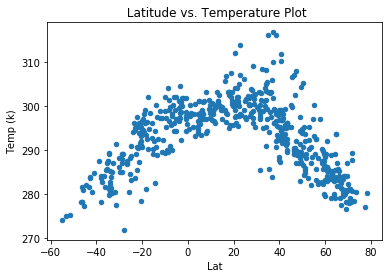

In [15]:
weatherdata.plot(kind = "scatter", x = "Lat", y = "Temp (k)", title = " Latitude vs. Temperature Plot")
plt.savefig("../output_data/Lat_vs_temp.png")


## Latitude vs. Humidity Plot

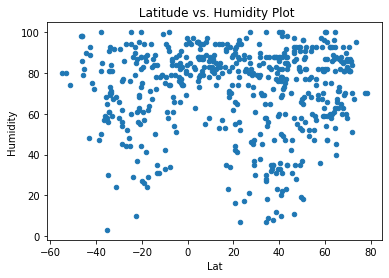

In [16]:
weatherdata.plot(kind = "scatter", x = "Lat", y = "Humidity", title = " Latitude vs. Humidity Plot")
plt.savefig("../output_data/Lat_vs_humidity.png")

## Latitude vs. Cloudiness Plot

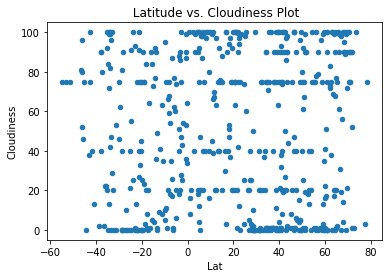

In [18]:
weatherdata.plot(kind = "scatter", x = "Lat", y = "Cloudiness", title = " Latitude vs. Cloudiness Plot")
plt.savefig("../output_data/Lat_vs_Cloudiness.png")


## Latitude vs. Wind Speed Plot

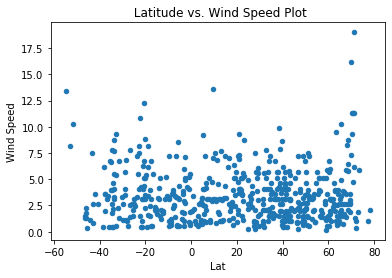

In [19]:
weatherdata.plot(kind = "scatter", x = "Lat", y = "Wind Speed", title = " Latitude vs. Wind Speed Plot")
plt.savefig("../output_data/Lat_vs_wind.png")

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots

northern = weatherdata.loc[weatherdata["Lat"] >= 0]
northern.reset_index(inplace=True)

southern = weatherdata.loc[weatherdata["Lat"] < 0]
southern.reset_index(inplace=True)
northern

,index,city,Long,Lat,Temp (k),Humidity,Cloudiness,Wind Speed,Country,Date
0,0,fagersta,15.79,60.00,288.45,82,22,1.50,SE,1597619846
1,2,albany,-73.97,42.60,295.72,60,27,3.07,US,1597619205
2,3,manga,-1.07,11.66,296.53,89,70,1.88,BF,1597619847
3,11,dingle,122.67,11.00,298.92,86,39,0.84,PH,1597619533
4,13,barstow,-117.02,34.90,316.27,9,1,4.60,US,1597619817
...,...,...,...,...,...,...,...,...,...,...
365,532,ndele,20.65,8.41,294.35,97,100,1.13,CF,1597619985
366,533,mandan,-100.89,46.83,302.44,35,1,7.20,US,1597619985
367,534,vestmannaeyjar,-20.27,63.44,285.19,89,69,9.48,IS,1597620148
368,535,hobyo,48.53,5.35,297.51,79,47,9.21,SO,1597619986


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5075586893827219


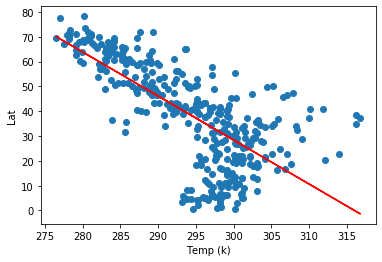

In [21]:
x_values = northern['Temp (k)']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temp (k)')
plt.ylabel('Lat')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/north_tempVSlat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6850705579870707


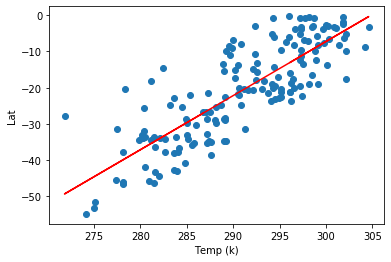

In [22]:
x_values = southern['Temp (k)']
y_values = southern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temp (k)')
plt.ylabel('Lat')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/south_tempVSlat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004509375558968885


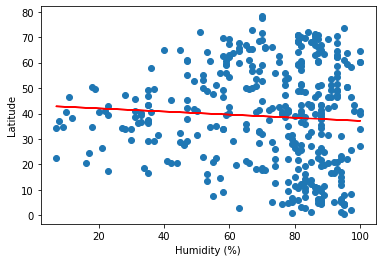

In [23]:
x_values = northern['Humidity']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/north_humLat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0022609533973053323


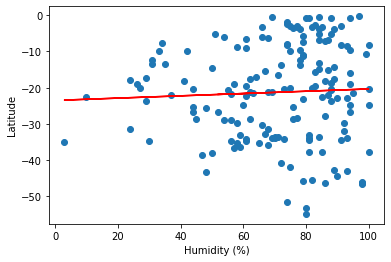

In [24]:
x_values = southern['Humidity']
y_values = southern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/south_humLat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0022852931607586203


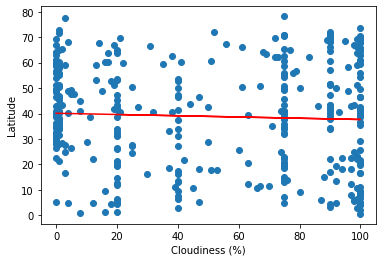

In [25]:
x_values = northern['Cloudiness']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/north_cloudLat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007013985272623007


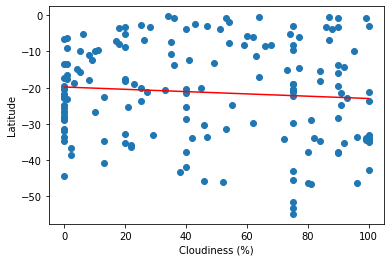

In [26]:
x_values = southern['Cloudiness']
y_values = southern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/south_cloudLat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005784368140951891


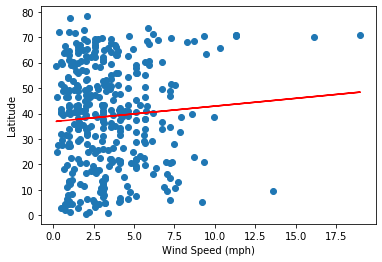

In [27]:
x_values = northern['Wind Speed']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/north_windLat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02340985644802869


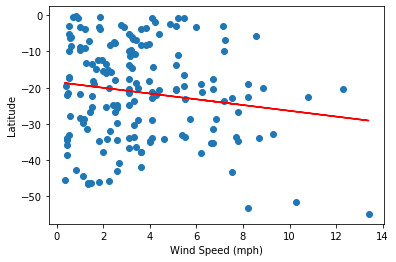

In [28]:
x_values = southern['Wind Speed']
y_values = southern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/south_windLat.png")
plt.show()